In [1]:
!ls

 GalaxyOn5Reviews.txt  'Text Analytics & Sentiment Classification.ipynb'


# Text Analytics

In [2]:
import re
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import nltk

In [3]:
#Return an ndarray
review_text = np.loadtxt("GalaxyOn5Reviews.txt", dtype='str', delimiter="\n")
review_text = review_text[3:]# Removing the unnecessary lines
print(review_text.shape)

(883,)


In [4]:
# Just to understand the structure of review_text
for i in review_text[:10]:
    print(i)
    print( "----------------------------------------------------")

4.0 out of 5 starsworth for money
----------------------------------------------------
Bynithesh thomason 9 May 2017
----------------------------------------------------
Colour: Gold|Verified Purchase
----------------------------------------------------
Excellent phone ...... Battery life is nice and good camera clarity. Processor working fine and design also looks like premium mobile
----------------------------------------------------
Comment| 5 people found this helpful. Was this review helpful to you?YesNoReport abuse
----------------------------------------------------
5.0 out of 5 starsGood
----------------------------------------------------
ByAmazon Customeron 30 March 2017
----------------------------------------------------
Colour: Black|Verified Purchase
----------------------------------------------------
Good
----------------------------------------------------
Comment| 7 people found this helpful. Was this review helpful to you?YesNoReport abuse
--------------------------

In [5]:
# To find whether the string is a rating
def is_number(string):
    try:
        float(string)
        return True
    except:
        return False
    
def is_color(string):
    return re.match(r'Colour: ', string)

def is_review_date(string):
    return re.match(r'By(.)+on ', string)

def is_comment(string):
    return re.match('Comment| ', string)

In [6]:
ratings = []
colors = []
dates_of_review = []
comments = []
reviews = []

cnt = 1
for line in review_text:
    
    #Ratings list
    if is_number(line[:3]):
        rating = float(line[:3])
        ratings.append(rating)
        review_added = 0
        
    #Review date list
    elif is_review_date(line) :
        dates_of_review.append(line[is_review_date(line).end():])
        review_added = 0
        
    #Phone color list
    elif is_color(line):
        result2 = re.findall(r'^\w+', line[is_color(line).end():])
        colors.append(result2[0])
        review_added = 0
        
    #Comments List
    elif is_comment(line):
        review_added = 0
        #do nothing
        pass
     
    #Reviews list
    else:
        if review_added:
            reviews[-1] = reviews[-1] + line
        else:
            reviews.append(line)
            review_added = 1
        
    cnt += 1

In [7]:
print("Number of ratings : "+str(len(ratings)))
print("Average Rating : "+ str(np.nanmean(ratings)))
print(ratings[:5]) 
print(colors[:5])
print(dates_of_review[:5])
print(reviews[:5])
print(len(ratings))
print(len(colors))
print(len(dates_of_review)) 
print(len(reviews))

Number of ratings : 170
Average Rating : 4.358823529411764
[4.0, 5.0, 5.0, 2.0, 4.0]
['Gold', 'Black', 'Gold', 'Gold', 'Gold']
['9 May 2017', '30 March 2017', '13 February 2017', '4 May 2017', '17 March 2017']
['Excellent phone ...... Battery life is nice and good camera clarity. Processor working fine and design also looks like premium mobile', 'Good', 'amazing', 'One sim slot does not work.', 'A good product for the price... Its made only for Indian sim which was not mentioned in the product description. That is a major flaw as far as I am concerned.']
170
170
170
170


In [8]:
#Creating Data frames
reviews_lot = [('Review_Date', dates_of_review),
              ('Color', colors),
              ('5_Star_Rating', ratings),
              ('Review', reviews)] 
reviews_df = pd.DataFrame.from_items(reviews_lot)

In [9]:
print(reviews_df.head())

        Review_Date  Color  5_Star_Rating  \
0        9 May 2017   Gold            4.0   
1     30 March 2017  Black            5.0   
2  13 February 2017   Gold            5.0   
3        4 May 2017   Gold            2.0   
4     17 March 2017   Gold            4.0   

                                              Review  
0  Excellent phone ...... Battery life is nice an...  
1                                               Good  
2                                            amazing  
3                        One sim slot does not work.  
4  A good product for the price... Its made only ...  


In [11]:
# Creating corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() 

corpus = []

#Text Cleaning
for i in range(len(reviews_df['Review'])):
    review = reviews_df['Review'][i]
    review = re.sub('[^a-zA-z]', " ", review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    #reviews_df['Review'][i] = review
    corpus.append(review)
    
print(reviews_df['Review'].head())

[nltk_data] Downloading package stopwords to /home/gokul/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0    Excellent phone ...... Battery life is nice an...
1                                                 Good
2                                              amazing
3                          One sim slot does not work.
4    A good product for the price... Its made only ...
Name: Review, dtype: object


In [12]:
print(len(corpus))
for i in range(5):
    print(corpus[i])

170
excel phone batteri life nice good camera clariti processor work fine design also look like premium mobil
good
amaz
one sim slot work
good product price made indian sim mention product descript major flaw far concern


In [13]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
new_corpus = ""
for review in corpus:
    new_corpus = new_corpus + " " + review
    
new_corpus_tokenized = nltk.word_tokenize(new_corpus)
text = nltk.pos_tag(new_corpus_tokenized)
print("Word => PartOfSpeech")
print("--------------------")
for i in text[:10]:
    print(i[0] + " => " + i[1])

[nltk_data] Downloading package punkt to /home/gokul/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gokul/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Word => PartOfSpeech
--------------------
excel => NN
phone => NN
batteri => JJ
life => NN
nice => RB
good => JJ
camera => NN
clariti => NN
processor => NN
work => NN


In [14]:
!pip install wordcloud

    100% |████████████████████████████████| 368kB 16.9MB/s ta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


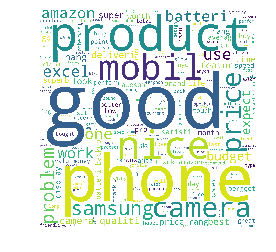

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
                      width=3000,
                      height=3000
                     ).generate(new_corpus)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

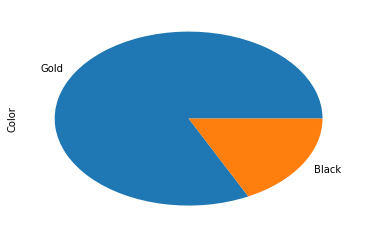

In [16]:
reviews_df.Color.value_counts().plot(kind = 'pie')
plt.show()

# Sentiment Classification

In [17]:
reviews_df['CleanedReview'] = corpus
reviews_df['Sentiment'] = (reviews_df['5_Star_Rating']>3).astype(np.int)

In [18]:
print(reviews_df.head())

        Review_Date  Color  5_Star_Rating  \
0        9 May 2017   Gold            4.0   
1     30 March 2017  Black            5.0   
2  13 February 2017   Gold            5.0   
3        4 May 2017   Gold            2.0   
4     17 March 2017   Gold            4.0   

                                              Review  \
0  Excellent phone ...... Battery life is nice an...   
1                                               Good   
2                                            amazing   
3                        One sim slot does not work.   
4  A good product for the price... Its made only ...   

                                       CleanedReview  Sentiment  
0  excel phone batteri life nice good camera clar...          1  
1                                               good          1  
2                                               amaz          1  
3                                  one sim slot work          0  
4  good product price made indian sim mention pro...          

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_count = cv.fit_transform(corpus)
print(X_count.shape)

(170, 337)


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X_count).toarray()

In [31]:
print(tfidf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from sklearn.model_selection import train_test_split

# Split our data
X_train, X_test, y_train, y_test = train_test_split(tfidf, reviews_df['Sentiment'], test_size=0.33, random_state=100)

print(X_train.shape, y_train.shape)

(113, 337) (113,)


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
y_pred = rf.predict(X_test)
print(y_pred[:5])

[1 1 1 1 0]


In [35]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 2  5]
 [ 0 50]]
             precision    recall  f1-score   support

          0       1.00      0.29      0.44         7
          1       0.91      1.00      0.95        50

avg / total       0.92      0.91      0.89        57



# Test

In [39]:
#Example
new_reviews = ["Performance is Good..........Average camera", 
           "1) restarts frequently 2) slow multi tasking 3) Heating issues while charging  ",
           "Awesome camera quality. UI is appealing. Better than other phones in this price range" ]

def to_root_sentence(review):
    review = re.sub('[^a-zA-z]', " ", review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    return review
    
def build_feature_vector(review):
    X = transformer.transform(cv.transform([review])).toarray()
    return X

sentiment = {0:"-ve", 1:"+ve"}
for review in new_reviews:
    print(review)
    review = to_root_sentence(review)
    print(review)
    X = build_feature_vector(review)
    print("-----   Predicted Sentiment :", rf.predict_proba(X), "  -----\n")

Performance is Good..........Average camera
perform good averag camera
-----   Predicted Sentiment : [[0.2 0.8]]   -----

1) restarts frequently 2) slow multi tasking 3) Heating issues while charging  
restart frequent slow multi task heat issu charg
-----   Predicted Sentiment : [[0.4 0.6]]   -----

Awesome camera quality. UI is appealing. Better than other phones in this price range
awesom camera qualiti ui appeal better phone price rang
-----   Predicted Sentiment : [[0. 1.]]   -----

